In [113]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import generacion_cartoon.utils.paths as path
import os
import generacion_cartoon.utils.funtions as funtions

In [115]:
for name in ['train', 'test', 'validation']:
    if path.data_processed_dir(name).exists() == False:
        os.makedirs(path.data_processed_dir(name))


In [116]:
data_path = path.data_processed_dir('cartoon_png')
name_png = os.listdir(data_path)

In [117]:
train, val, test = funtions.split_dataset(name_png)

In [118]:
for name,lista in zip([train,test,val], ['train','test','validation']):
    funtions.move_files(
        path_source=data_path,
        path_destination=path.data_processed_dir(lista),
        name_list=name)

In [119]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


In [120]:
def make_dir_longname(name):
    list_dir = path.data_processed_dir(name)
    dir_name = [os.path.join(list_dir,name_file) for name_file in os.listdir(list_dir)]
    return dir_name

In [121]:
train_dir = make_dir_longname("train")
val_dir = make_dir_longname("validation")
test_dir = make_dir_longname("test")

In [154]:
train_ds = funtions.make_dataset(train_dir)
val_ds   = funtions.make_dataset(val_dir)
test_ds  = funtions.make_dataset(test_dir)


In [162]:
datasets = {
    "train": train_ds,
    "validation": val_ds,
    "test": test_ds
}

for name, ds in datasets.items():
    count = tf.data.experimental.cardinality(ds).numpy()
    print(f"Number of batches of 32 images {name}_ds: {count}")

Number of batches of 32 images train_ds: 250
Number of batches of 32 images validation_ds: 32
Number of batches of 32 images test_ds: 32


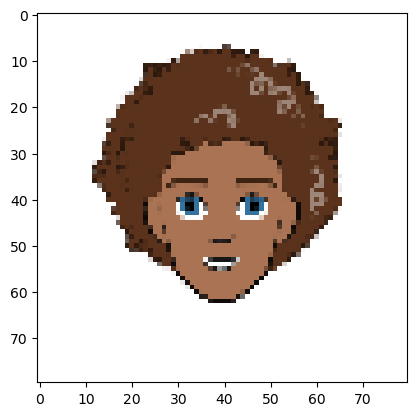

In [172]:
for i in train_ds:
    plt.imshow(i[0])
    plt.show()
    break